想像一下你是一個披薩公司（像是必X客、達X樂）的資料科學家，你成功建立一個模型能預測披薩是美味的披薩還是難吃的披薩，假設使用在烤披薩的中間過程中的兩個量測數值：溫度以及濕度來建立的模型為：

    模型的決策邊界： -100 + 6*溫度 + 3*濕度 = 0

-100 + 6*溫度 + 3*濕度 > 0 預測是一個美味的披薩

-100 + 6*溫度 + 3*濕度 < 0 預測是一個難吃的披薩

當你發現這個模型，你很興奮的跑去跟主管以及工作人員講解這個模型，卻發現沒人聽得懂你在幹嘛，還會覺得你根本不懂怎麼烤披薩的知識，不要來亂。（這常常是前線人員對於資料科學家的觀感，就是一群不懂專業知識的人來亂唬爛ＸＤ）

這只是一個最簡單的模型，實際上的模型會複雜超級多，像是：

-100 + 6*溫度² + 3*濕度³ + 20*溫度*濕度² + -70*溫度*濕度²*氣壓 +…..

這樣就更沒人可以理解你在幹嘛了

如果你今天改變你的說法跟你的老闆說，你發現在烘烤披薩的過程中，只要溫度維持在120–125度，濕度維持在5%-7%，就會是一個美味的披薩。你的老闆跟前線人員馬上能聽懂這句話的意思，而且會覺得你很專業，開始更重用資料分析在披薩公司，即使這樣的準確度可能沒有比上面提到的多項式模型還精準，但常常在真實環境中模型的“可解釋性(Interpretability)”是很重要的，而決策樹就是一個解釋性能力很強的模型。

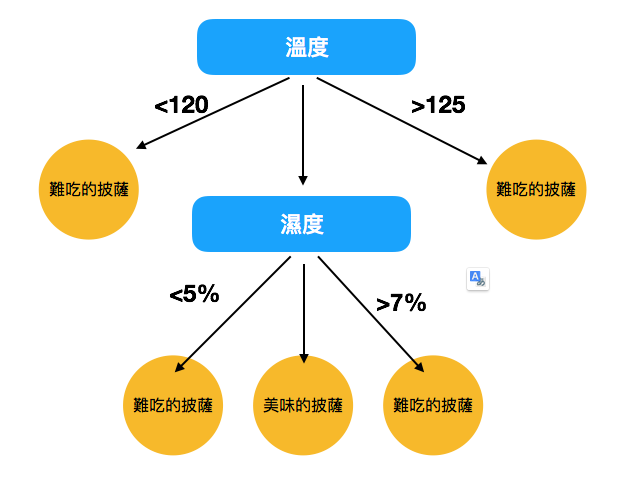

在訓練過程中決策樹會問出一系列的問題像是溫度是否>125 ，濕度是否<5%之類的是非問題。首先會從最後上方的樹根開始將資料的特徵將資料分割到不同邊(比方說依據溫度將資料切成三份)，分割的原則是：這樣的分割要能得到最大的資訊增益(Information gain, 簡稱IG)。

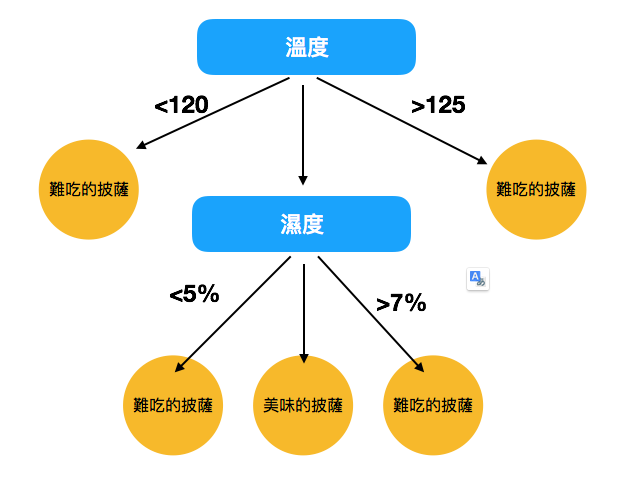

由於我們希望獲得的資訊量要最大，因此經由分割後的資訊量要越小越好。

常見的資訊量有兩種：熵(Entropy) 以及 Gini不純度(Gini Impurity)

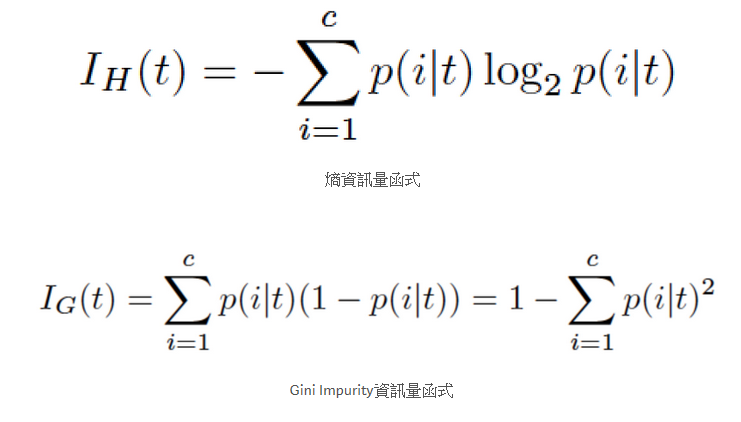

看起來有點複雜，我們就實際舉個例子來說明吧！假設有80筆資料，有40是1類別、40筆是2類別。使用兩種不同的切割方法，第一種切割法（Ａ）會變把資料變成各40筆，其中左邊那份包含30筆1類別資料、10筆2類別資料，右邊包含10筆1類別資料、30筆2類別資料。第二種切割法（Ｂ）會把資料切成60/20筆，其中左邊那份包含20筆1類別資料、40筆2類別資料，右邊那份包只含了20筆1類別的資料。

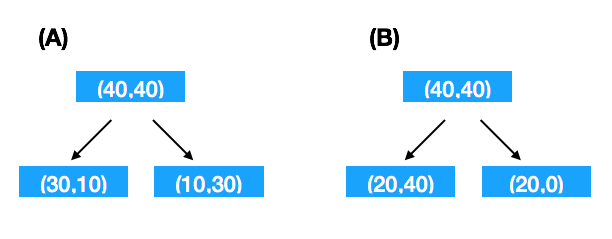

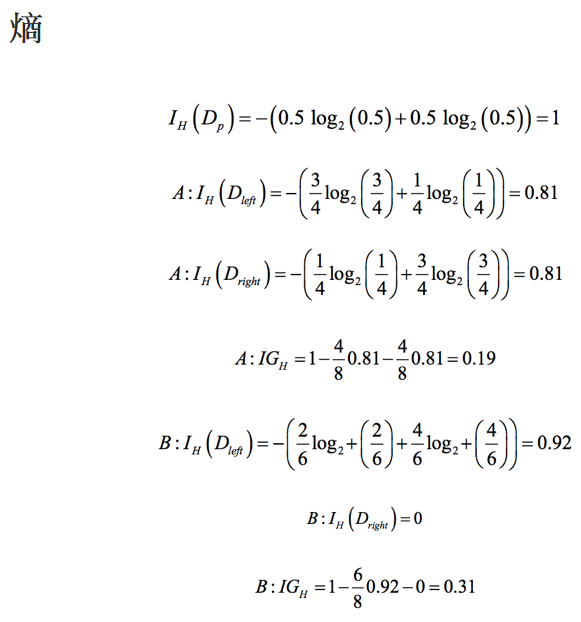

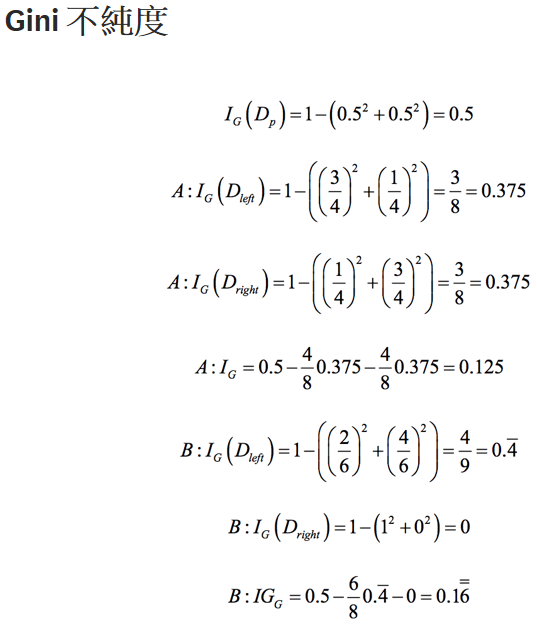

我們可以發現不管是熵或是Gini不純度，都比較偏好第二種切割方法(B)

接下來介紹一下如何使用決策樹來的分類Iris資料集！

## 載入Iris資料集

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
##################################抓0 2 target
iris_data = iris_data[iris_data['target'].isin([0,2])]
####################################################################
iris_data.head()

target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


## 將資料的70%拿出來train，剩下的30％用來檢測train的好壞

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['sepal length (cm)','petal length (cm)']], iris_data[['target']], test_size=0.3, random_state=0)

# Decision Tree 不需要做特徵標準化

In [7]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# sc.fit(X_train)
# X_train_std = sc.transform(X_train)
# X_test_std = sc.transform(X_test)

## DecisionTreeClassifier 參數
    criterion: entropy, gini impurity
    max_depth : 主要是可以防止樹長得過高造成overfit
    max_features: 最多只能挑K種feature去分類
    min_samples_leaf: leaf node最小sample數
    

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
clf = DecisionTreeClassifier(criterion = 'entropy', random_state=0)

In [78]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

## 寫個迴圈看一下預測結果，發現也全部預測正確了！另外也可以用score函數來計算正確率

In [39]:

clf.predict(X_test)

array([0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 2, 2])

In [81]:
print(y_test)

     target
114       2
62        1
33        0
107       2
7         0
100       2
40        0
86        1
76        1
71        1
134       2
51        1
73        1
54        1
63        1
37        0
78        1
90        1
45        0
16        0
121       2
66        1
24        0
8         0
126       2
22        0
44        0
97        1
93        1
26        0
137       2
84        1
27        0
127       2
132       2
59        1
18        0
83        1
61        1
92        1
112       2
2         0
141       2
43        0
10        0


In [40]:
y_test['target'].values

array([0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 2, 2])

In [41]:
error = 0
for i, v in enumerate(clf.predict(X_test)):
    if v!= y_test['target'].values[i]:
        print(i,v)
        error+=1
print(error)

0


In [42]:
clf.score(X_test,y_test['target'])

1.0

In [43]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

## 視覺化決策樹的決策邊界

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


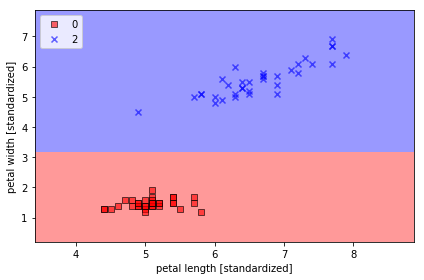

In [44]:
plot_decision_regions(X_train.values, y_train['target'].values, classifier=clf)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [45]:
clf_2 = DecisionTreeClassifier(criterion = 'gini', random_state=0)

In [46]:
clf_2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


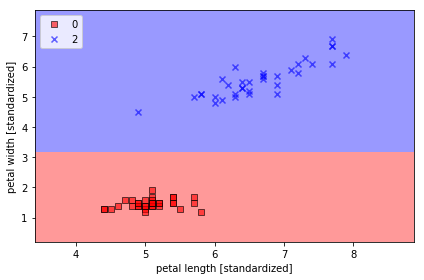

In [47]:
plot_decision_regions(X_train.values, y_train['target'].values, classifier=clf_2)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## 另外我們可以使用export_graphviz函式來將樹的實際長相視覺化

　scikit-learn中决策树的可视化一般需要安装graphviz。主要包括graphviz的安装和python的graphviz插件的安装。

　　　　第一步是安装graphviz。下载地址在：http://www.graphviz.org/。如果你是linux，可以用apt-get或者yum的方法安装。如果是windows，就在官网下载msi文件安装。无论是linux还是windows，装完后都要设置环境变量，将graphviz的bin目录加到PATH，比如我是windows，将C:/Program Files (x86)/Graphviz2.38/bin/加入了PATH

　　　　第二步是安装python插件graphviz： pip install graphviz

　　　　第三步是安装python插件pydotplus。这个没有什么好说的: pip install pydotplus

　　　　这样环境就搭好了，有时候python会很笨，仍然找不到graphviz，这时，可以在代码里面加入这一行：

　　　　os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

　　　　注意后面的路径是你自己的graphviz的bin目录。

In [48]:
from sklearn.tree import export_graphviz

### 方法一：export_graphviz 将树导出为 Graphviz 格式

In [49]:
import os
os.environ['PATH'] = os.environ['PATH'] + (';c:\\Program Files (x86)\\Graphviz2.38\\bin\\')
from sklearn import tree
from sklearn.datasets import load_iris 


In [50]:
#训练完成后，我们可以用 export_graphviz 将树导出为 Graphviz 格式
with open("tree.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

### 方法二：使用 pydotplus 直接生成 iris.pdf

In [51]:
import pydotplus
dot_data=tree.export_graphviz(clf,out_file=None)
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('iris.pdf')

InvocationException: GraphViz's executables not found

### 方法三：直接在 jupyter notebook 中生成

In [52]:
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=['sepal length (cm)','petal length (cm)'],  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)   
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

InvocationException: GraphViz's executables not found

In [53]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['petal width (cm)','petal length (cm)','target']]
iris_data.head(3)

target_names: ['setosa' 'versicolor' 'virginica']


,petal width (cm),petal length (cm),target
0,0.2,1.4,0
1,0.2,1.4,0
2,0.2,1.3,0


In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['petal width (cm)','petal length (cm)']], iris_data[['target']], test_size=0.3, random_state=0)

In [55]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=3, random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


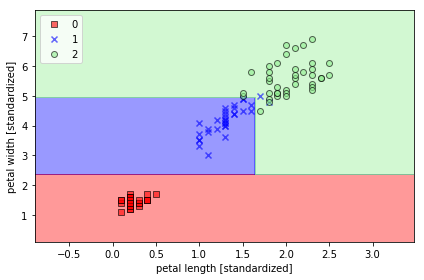

In [56]:
plot_decision_regions(X_train.values, y_train['target'].values, classifier=clf)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [57]:
with open("tree2.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

In [58]:
import pydotplus
dot_data=tree.export_graphviz(clf,out_file=None)
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('iris2.pdf')

InvocationException: GraphViz's executables not found

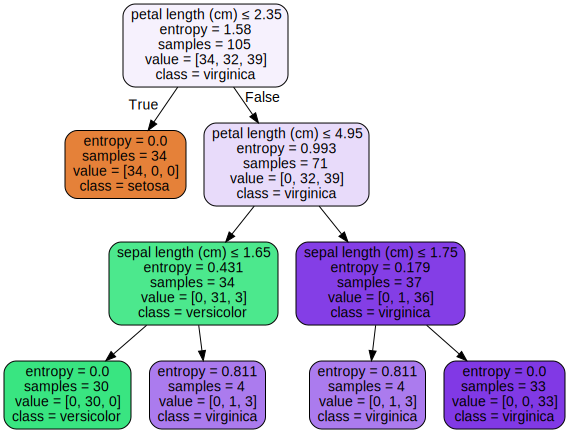

In [59]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=['sepal length (cm)','petal length (cm)'],  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


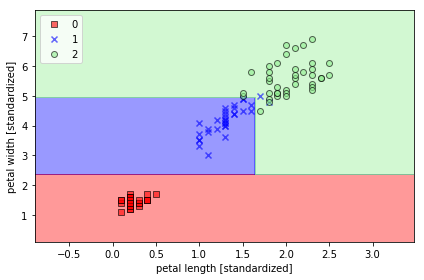

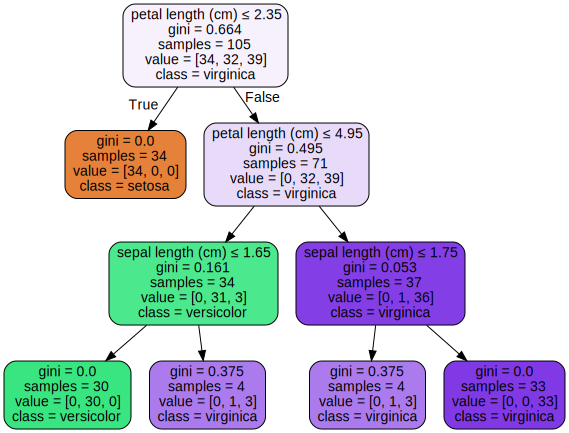

In [60]:
clf_3 = DecisionTreeClassifier(criterion = 'gini', random_state=0,max_depth=3)
clf_3.fit(X_train,y_train)
plot_decision_regions(X_train.values, y_train['target'].values, classifier=clf_3)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
import graphviz 
dot_data = tree.export_graphviz(clf_3, out_file=None,
                         feature_names=['sepal length (cm)','petal length (cm)'],  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


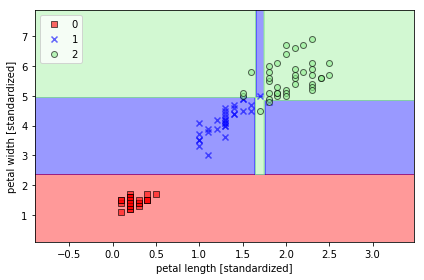

In [61]:
clf_2.fit(X_train,y_train)
plot_decision_regions(X_train.values, y_train['target'].values, classifier=clf_2)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

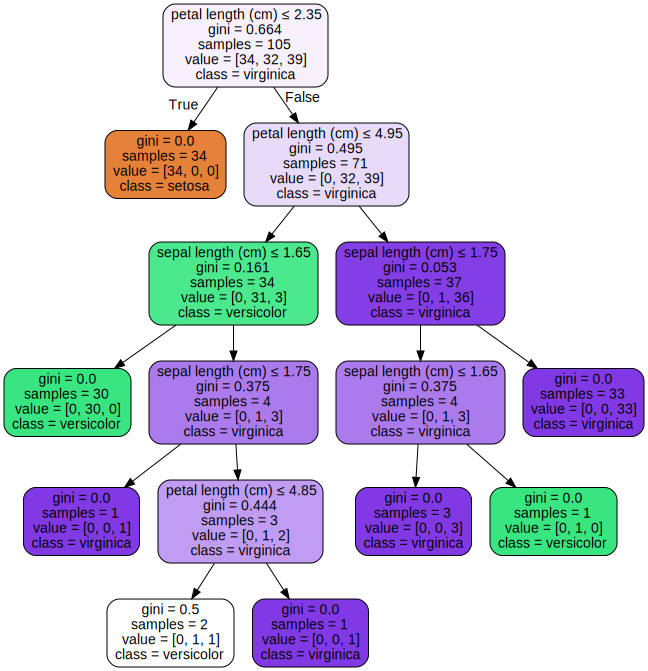

In [62]:
import graphviz 
dot_data = tree.export_graphviz(clf_2, out_file=None,
                         feature_names=['sepal length (cm)','petal length (cm)'],  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## 隨機森林(Random Forest)

挑部份Sample做成一顆Decison Tree, 再挑部份Sample做成一顆Decison Tree,..., 投票哪一棵樹比較好.

在近幾年隨機森林非常受到青睞，被運用在大量的機器學習應用中，它的效能、預測能力都很強，而且非常容易使用，另外隨機森林還能更去觀察每一個特徵的重要度。直覺來說，你可以把隨機森林當作是多個決策樹組合而成的，這個在機器學習領域稱為Ensemble中文可以叫整體或集成。相較於一般機器學習演算法是去培育一個天才模型的概念往往會有一些的限制，比如說這個天才模型可能在某些領域會有偏差或是不好的行為。整體機器學習(Ensemble learning)演算法則是結合多個弱學習器來建構一個強穩的模型，而這種模型比較不會有偏差或是發生高度適合(Overfit)。簡單來說機器學習演算法有兩種，一種是天才領導型的、一種是眾人投票型的，而隨機森林就是屬於眾人投票型的。

在實務上使用隨機森林的程式很簡單，如下圖所示，你所需要關心的參數主要只有n_estimators樹木的多寡(你要創造幾個決策樹來投票)，通常越多越好，但運算時間也會拉長。n_jobs主要是隨機森林支援平行運算，你可以決定要用你電腦的幾個核心去算，來加速運算速度。



In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
forest = RandomForestClassifier(criterion='entropy', n_estimators=100000,random_state=3,n_jobs=8)

In [65]:
forest.fit(X_train,y_train['target'].values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100000, n_jobs=8,
            oob_score=False, random_state=3, verbose=0, warm_start=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


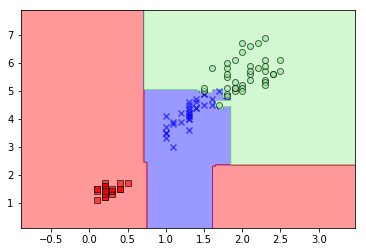

In [66]:
plot_decision_regions(X_train.values, y_train['target'].values, classifier=forest)

In [67]:
forest.score(X_train,y_train['target'])

0.9904761904761905

In [68]:
importances = forest.feature_importances_
indices = np.argsort(importances)

Text(0.5, 0, 'Relative Importance')

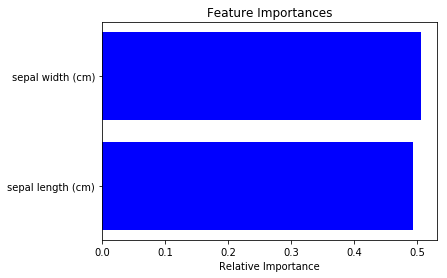

In [69]:
plt.figure(1)
features = x.columns[0:4]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')